<a href="https://colab.research.google.com/github/flapperz/NLP_2021/blob/main/MIDTERM/midterm_q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!gdown --id 1LHo-ICoeKAOBotSv2gbWF0K7fAbrQQxq
!gdown --id 15k6YNv4MxGt8N7LelCLfGx7xKSPPuhzD

Downloading...
From: https://drive.google.com/uc?id=1LHo-ICoeKAOBotSv2gbWF0K7fAbrQQxq
To: /content/test_without_label.pkl
100% 1.15M/1.15M [00:00<00:00, 18.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=15k6YNv4MxGt8N7LelCLfGx7xKSPPuhzD
To: /content/train_with_label.pkl
3.18MB [00:00, 50.1MB/s]


In [ ]:
def write_submission(submission, path = 'out.txt'):
  f = open(path, 'wb')
  [f.write((i + '\n').encode()) for i in submission ]

import pickle
X_train = pickle.load(open('train_with_label.pkl', 'rb'))
X_test = pickle.load(open('test_without_label.pkl', 'rb'))



In [ ]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
# write_submission(submission_template)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## EDA

In [ ]:
from pythainlp.spell import correct, spell, NorvigSpellChecker
correct('‡∏Ñ‡∏£‡∏±‡∏ü')

In [ ]:
def unpack_index(l):
    idx0 = l[0]
    idx1 = l[1]
    if idx0 == idx1 - 1:
        return [l]
    res = []
    for idx in range(idx0,idx1):
        res.append([idx,idx+1])
    return res


In [ ]:
misspellw = []
correctw = []
for x in X_train:
    sent = x[0]
    
    for label in x[1]:
        misspellw += sent[label[0][0]:label[0][1]]
        correctw += label[1]
misspellw_set = set(misspellw)
df_corrw = pd.DataFrame({'word':correctw, 'c':[1]*len(correctw)})
df_missw = pd.DataFrame({'word':misspellw, 'c':[1]*len(misspellw)})

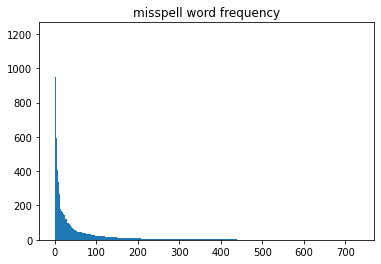

In [ ]:
agg = df_missw.groupby('word').count().sort_values(['c'], ascending=False)

plt.bar(np.arange(len(agg)),agg.c.values,width=1)
plt.title('misspell word frequency')
plt.show()

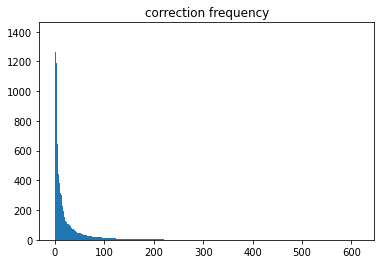

In [ ]:
agg2 = df_corrw.groupby('word').count().sort_values(['c'], ascending=False)

plt.bar(np.arange(len(agg2)),agg2.c.values,width=1)
plt.title('correction frequency')
plt.show()

In [ ]:
for w in agg.index[:200]:
    print(w + ' ', end='')
print()
for w in agg2.index[:200]:
    print(w + ' ', end='')
    

‡∏≠‡πà‡∏∞ ‡∏Ñ‡πà‡∏∞ ‡∏Ñ‡∏±‡∏ö ‡∏Ñ‡∏∞ ‡∏Ñ‡πâ‡∏∞ ‡πÄ‡∏ö‡∏≠ ‡∏™‡∏°‡∏±‡∏Ñ ‡∏°‡∏±‡πâ‡∏¢ ‡∏≠‡πà‡∏≠ ‡πÅ‡∏≠‡∏û ‡πÄ‡∏õ‡∏ô ‡∏Å‡πâ ‡∏¢‡∏±‡∏á‡πÑ‡∏á ‡πÅ‡∏≠‡∏ü ‡πÉ‡∏î‡πâ ‡πÑ‡∏° ‡∏°‡∏±‡πä‡∏¢ ‡∏Ñ‡∏±‡∏ü ‡∏≠‡∏¢‡∏∏‡πà ‡πÑ‡∏á ‡∏´‡∏£‡∏≠ ‡πÉ‡∏´‡∏° ‡∏ö‡∏ä ‡πÄ‡∏£‡∏¢ ‡πÇ‡∏ó‡∏£‡∏®‡∏±‡∏û ‡∏ö‡∏±‡∏ô‡∏ä‡∏µ ‡∏Å‡πâ‡∏≠ ‡πÑ‡∏´‡∏°‡πà ‡πÄ‡∏Ñ‡∏î‡∏¥‡∏ï ‡∏£‡∏∏‡πâ ‡πÅ‡∏£‡πâ‡∏ß ‡πÉ‡∏´‡∏ô ‡∏õ‡πà‡∏∞ ‡∏°‡πà ‡∏≠‡∏∞ ‡∏Ñ‡πà ‡πÄ‡∏Ñ‡πâ‡∏≤ ‡∏ï‡∏±‡∏á ‡∏≠‡πâ‡∏∞ ‡πÄ‡∏õ‡∏•‡∏µ‡∏¢‡∏ô ‡∏¢‡∏±‡∏á‡∏á‡∏±‡∏¢ ‡∏ï‡∏∏‡πâ ‡∏Ç‡∏≠‡∏ö‡∏Ñ‡∏∏‡∏ô   ‡∏õ‡πà‡∏≤‡∏ß ‡πÑ‡∏ä‡πà ‡πÄ‡∏ä‡∏Ñ ‡πÉ‡∏ä‡πà ‡∏Ñ ‡πÑ‡∏°‡πä ‡∏Ñ‡∏£‡πâ‡∏≤ ‡∏ô‡∏∂‡∏á ‡∏¢‡∏∏ ‡∏á‡∏±‡∏¢ ‡πÑ‡∏î‡πà ‡πÄ‡∏ó‡πà‡∏≤‡πÑ‡∏´‡∏£‡πà ‡∏î‡∏¥ ‡∏≠‡∏¥‡∏ô‡πÄ‡∏ï‡∏≠‡∏£‡πå‡πÄ‡∏ô‡πá‡∏ï ‡πÉ‡∏°‡πà ‡∏à‡∏Ç‡∏Å‡∏ó ‡πÄ‡∏ö‡∏≠‡∏£ ‡πÇ‡∏ó‡∏£‡∏™‡∏±‡∏ö ‡∏à‡∏£‡πâ‡∏≤ ‡πÇ‡∏ó‡∏£‡∏®‡∏±‡∏û‡∏¢‡πå ‡∏ö‡∏±‡∏ä‡∏ä‡∏µ ‡∏Ñ‡πà‡∏≤‡∏≤‡∏≤ ‡∏Ñ‡∏£‡∏±‡∏ä . ‡∏Ç‡∏≠‡πÇ‡∏ó‡∏î ‡πÇ‡∏ó‡∏£‡∏™‡∏±‡∏û ‡∏ò ‡πÇ‡∏´‡∏•‡∏î ‡πÄ‡∏ô‡∏ï ‡∏Ñ‡πà‡∏≤ ‡∏ô‡πà‡∏∞ ‡∏£‡∏∂‡∏õ‡πà‡∏≤‡∏ß ‡∏Ñ‡πä‡∏∞ ‡πÄ‡∏î‡πã‡∏ß ‡∏´‡∏£‡∏∑‡∏≠‡∏õ‡πà‡∏≤‡∏ß ‡πÑ‡∏°‡πà ‡πÄ‡∏ß‡∏õ ‡πÇ‡∏ó‡∏™‡∏±‡∏ö ‡∏ô‡πà‡∏≠‡∏¢ ‡∏ô

In [ ]:
MAX_KEY_LEN = 6
miss2corr_dict = defaultdict(lambda :defaultdict(int))

for x in X_train:
    sent = x[0]
    
    for label in x[1]:
        # di = label[0][1] - label[0][0]
        # if label[0][1] - label[0][0] == 1:
        #     unpacked = unpack_index(label[0])
        #     for i,idx in enumerate(unpacked):
        #         miss2corr_dict[(sent[idx[0]],)][(label[1][i],)] += 1
        # else:
        key = tuple(sent[label[0][0]:label[0][1]])

        miss2corr_dict[key][tuple(label[1])] += 1
len(miss2corr_dict)

1589

In [ ]:
miss2corr_dict

## Preprocess

In [ ]:
X_train_pp = [x[0] for x in X_train]

In [ ]:
y_train = []
for x in X_train:
    sent = x[0]
    morph = []
    idx = 0
    for label in x[1]:
        morph += sent[idx:label[0][0]]
        morph += label[1]
        idx = label[0][1]
    morph += sent[idx:len(sent)]
    y_train.append(morph)

## Non-Word / Real-Word classification and correction (Busted)

### None-Word Missspell

In [ ]:
!wget https://gist.githubusercontent.com/anonymous/36568e5aaa73790e718757ff5f481afe/raw/51fa364bab4783596c3192c2c1d4b155fbdac83d/thai.dict

--2021-03-14 11:25:29--  https://gist.githubusercontent.com/anonymous/36568e5aaa73790e718757ff5f481afe/raw/51fa364bab4783596c3192c2c1d4b155fbdac83d/thai.dict
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 857451 (837K) [text/plain]
Saving to: ‚Äòthai.dict‚Äô

thai.dict           100%[===================>] 837.35K  --.-KB/s    in 0.02s   

2021-03-14 11:25:29 (47.4 MB/s) - ‚Äòthai.dict‚Äô saved [857451/857451]



In [ ]:
!pip install pythainlp

In [ ]:
# dictionary0
dict0 = set()
with open('thai.dict','r') as f:
    for l in f:
        dict0.add(l.strip())
dict0.update(['‡∏Ñ‡πà‡∏∞'])

# tcc corpus
import pythainlp.corpus.ttc as tcc
tcc_dict = set()
tcc_word_freqs = tcc.word_freqs()
for freq in tcc_word_freqs:
    tcc_dict.add(freq[0])

# train set
kbtg_dict = set()
for k,v in miss2corr_dict.items():
    if len(k) == 1:
        kbtg_dict.add(sorted(v.items(), key=lambda x: x[1], reverse=True)[0][0][0])
print(len(kbtg_dict))

# combine
extra_dict = {'‡∏Ñ‡∏≠‡∏•‡πÄ‡∏ã‡πá‡∏ô‡πÄ‡∏ï‡∏≠‡∏£‡πå', '‡∏à‡∏£‡∏¥‡∏á‡∏à‡∏£‡∏¥‡∏á'}

dictionary = tcc_dict
dictionary.update(dict0)
dictionary.update(kbtg_dict)
dictionary.update(extra_dict)

dictionary.remove(' ')
dictionary.remove('')
dictionary.remove('‡∏Å')
dictionary.remove('‡πÄ‡∏õ‡∏ô')
len(dictionary)

312


42501

In [ ]:
def is_nonword_miss(w, d):
    return not w in d

In [ ]:
# predict
y_train_s = []
for x in X_train:
    sent = x[0]
    pred = []
    for i,w in enumerate(sent):
        if is_nonword_miss(w, dictionary):
            if pred and pred[-1][1] == i:
                pred[-1] = [pred[-1][0],i+1]
            else:
                pred.append([i,i+1])
    y_train_s.append(list(pred))

# evaluate
tp = 0
tn = 0
fp = 0
fn = 0
for i,x in enumerate(X_train):
    actual = set()
    for label in x[1]:
        actual.update([idx[0] for idx in unpack_index(label[0])])
    pred = set()
    for label in y_train_s[i]:
        pred.update([idx[0] for idx in unpack_index(label)])

    n = len(x[0])
    tp_ = len(actual.intersection(pred))
    tp += tp_
    tn += n - len(actual.union(pred))
    fp += len(pred) - tp_
    fn += len(actual) - tp_

# print result
tp + tn + fp + fn
print('recall', tp/(tp+fn))
print('precision', tp/(tp+fp))
print('accuracy', (tp+tn)/(tp+tn+fp+fn))
print('fp-rate', fp/(tn+fp))
# print('#true', tp+fn)
# print('#false', tn+fp)
# print('sum',tp+tn+fp+fn)

recall 0.24640060621369034
precision 1.0
accuracy 0.8817654926437807
fp-rate 0.0


In [ ]:
'‡∏û‡∏ô‡∏á' in dictionary

False

In [ ]:
def find_cer(src,dst):
    m = np.zeros((len(src)+1,len(dst)+1), dtype=np.uint16)
    m[0,:] = np.arange(len(dst)+1)
    m[:,0] = np.arange(len(src)+1)
    for i in range(len(src)):
        for j in range(len(dst)):
            m[i+1,j+1] = min([
                              m[i,j+1] + 1,
                              m[i+1,j] + 1,
                              m[i,j] if src[i] == dst[j] else m[i,j] +1
            ])
    return m[-1,-1]
find_cer('‡∏Ç‡∏ô‡∏≠','‡∏Å‡∏Ç‡∏ô‡∏≤‡∏ô')

3

### ClassifyAndCorrect CNC

In [ ]:
one_word_list = list(filter(lambda k: len(k) == 1, miss2corr_dict))
correction_dict = {k[0]:sorted(miss2corr_dict[k].items(), reverse=True, key=lambda x: x[1])[0][0][0] for k in one_word_list}
list(correction_dict.items())[:5]

print('before clean', len(correction_dict))

# clean
del correction_dict['K PLUS']
del correction_dict['‡πÑ‡∏ß‡πÑ‡∏ü']
del correction_dict['‡πÅ‡∏≠‡∏õ']

keys = list(correction_dict.keys())
for k in keys:
    if k in dictionary:
        del correction_dict[k]



print('after clean', len(correction_dict))

cnc_cache = dict()
def correct_nonword(wi):
    if wi in dictionary:
        return wi
    
    if wi in correction_dict:
        return correction_dict[wi]
    elif wi in cnc_cache:
        return cnc_cache[wi]
    else:
        candidates = set(filter(lambda x: len(x) <= len(wi)+2 and len(x) >= len(wi)-2, dictionary))
        candidates = set(filter(lambda x: len(set(x).intersection(set(wi))) > len(set(wi))-3, candidates))
        order = sorted([(c,find_cer(c, wi)) for c in candidates], key=lambda x: x[1], reverse=False)
        res = ''
        if order and order[0][1] <= 4:
            res = order[0][0]
        else:
            print('cannot find candidate', wi)
            res = wi
        cnc_cache[wi] = res
        return res
    
print('‡∏´‡∏£‡∏¥‡∏≠',correct_nonword('‡∏´‡∏£‡∏¥‡∏≠'))
print('‡∏ñ‡∏π‡∏Å',correct_nonword('‡∏ñ‡∏π‡∏Å'))
print('‡∏ò‡∏£‡∏£‡∏°‡∏ä‡∏≤‡∏î',correct_nonword('‡∏ò‡∏£‡∏£‡∏°‡∏ä‡∏≤‡∏î'))
print('‡∏´‡∏¥‡∏™',correct_nonword('‡∏´‡∏¥‡∏™'))
print('‡∏Ñ‡∏≠‡∏•‡πÄ‡∏ã‡πâ‡∏ô‡πÄ‡∏ï‡∏≠‡∏£',correct_nonword('‡∏Ñ‡∏≠‡∏•‡πÄ‡∏ã‡πâ‡∏ô‡πÄ‡∏ï‡∏≠‡∏£'))
print('‡∏à‡∏£‡∏¥‡∏á‡∏à‡∏£‡∏¥‡πä‡∏á',correct_nonword('‡∏à‡∏£‡∏¥‡∏á‡∏à‡∏£‡∏¥‡πä‡∏á'))

before clean 505
after clean 336
‡∏´‡∏£‡∏¥‡∏≠ ‡∏´‡∏£‡∏∑‡∏≠
‡∏ñ‡∏π‡∏Å ‡∏ñ‡∏π‡∏Å
‡∏ò‡∏£‡∏£‡∏°‡∏ä‡∏≤‡∏î ‡∏ò‡∏£‡∏£‡∏°‡∏Å‡∏≤‡∏¢
‡∏´‡∏¥‡∏™ ‡∏´‡∏¥‡∏ô
‡∏Ñ‡∏≠‡∏•‡πÄ‡∏ã‡πâ‡∏ô‡πÄ‡∏ï‡∏≠‡∏£ ‡∏Ñ‡∏≠‡∏•‡πÄ‡∏ã‡πá‡∏ô‡πÄ‡∏ï‡∏≠‡∏£‡πå
‡∏à‡∏£‡∏¥‡∏á‡∏à‡∏£‡∏¥‡πä‡∏á ‡∏à‡∏£‡∏¥‡∏á‡∏à‡∏£‡∏¥‡∏á


In [ ]:
def get_cnc(s):
    res = [correct_nonword(wi) for wi in s]
    return res

## Rulebase E2E

### Rulebase 1 : 5.58

In [ ]:
# prepare dictionary
MAX_KEY_LEN = 6
miss2corr_dict = [defaultdict(list) for i in range(MAX_KEY_LEN)]
for x in X_train:
    sent = x[0]
    
    for label in x[1]:
        di = label[0][1] - label[0][0]

        key = tuple(sent[label[0][0]:label[0][1]])

        miss2corr_dict[di-1][key].append(tuple(label[1]))

correction_dict = [defaultdict(tuple) for i in range(MAX_KEY_LEN)]
for di in range(6):
    d = miss2corr_dict[di]
    for k,v in d.items():
        candidate = list(set(v))
        candidate_freq = [v.count(cd) for cd in candidate]
        first = sorted(list(zip(candidate_freq,candidate)),reverse=True)[0]
        if first[0] > 100:
            correction_dict[di][k] = first[1]

# clean
correction_dict[1][('‡∏≠‡∏∞', '‡∏Ñ‡∏∞')] = ('‡∏≠‡∏∞', '‡∏Ñ‡πà‡∏∞')

def get_correct_rulebase(s):
    res = []

    i = 0
    while i < len(s):
        # print(i)
        for di in range(2,-1,-1):
            i2 = i + di + 1
            phrase = tuple(s[i:i2]) 
            if phrase in correction_dict[di]:
                # print('correct',phrase, correction_dict[di][phrase],di)
                res += correction_dict[di][phrase]
                i = i2
                break
        else:
            # print('normal', s[i:i+1], s[i])
            res += s[i:i+1]
            i += 1
    return res

print(''.join(get_correct_rulebase(X_train_pp[3])))
print(''.join(y_train[3]))

### Rulebase 2 4.94

In [ ]:
# prepare dictionary
MAX_KEY_LEN = 6
miss2corr_dict = [defaultdict(list) for i in range(MAX_KEY_LEN)]
for x in X_train:
    sent = x[0]
    
    for label in x[1]:
        di = label[0][1] - label[0][0]

        key = tuple(sent[label[0][0]:label[0][1]])

        miss2corr_dict[di-1][key].append(tuple(label[1]))

correction_dict = [defaultdict(tuple) for i in range(MAX_KEY_LEN)]
for di in range(6):
    d = miss2corr_dict[di]
    for k,v in d.items():
        candidate = list(set(v))
        candidate_freq = [v.count(cd) for cd in candidate]
        first = sorted(list(zip(candidate_freq,candidate)),reverse=True)[0]
        minimum = 1
        if di == 0:
            minimum = 50
        elif di == 1:
            minimum = 10
        elif di == 2:
            minimum = 3
             
        if first[0] > minimum:
            correction_dict[di][k] = first[1]

# clean
correction_dict[1][('‡∏≠‡∏∞', '‡∏Ñ‡∏∞')] = ('‡∏≠‡∏∞', '‡∏Ñ‡πà‡∏∞')

def get_correct_rulebase(s):
    res = []

    i = 0
    while i < len(s):
        # print(i)
        for di in range(3,-1,-1):
            i2 = i + di + 1
            phrase = tuple(s[i:i2]) 
            if phrase in correction_dict[di]:
                # print('correct',phrase, correction_dict[di][phrase],di)
                res += correction_dict[di][phrase]
                i = i2
                break
        else:
            # print('normal', s[i:i+1], s[i])
            res += s[i:i+1]
            i += 1
    return res

print(''.join(get_correct_rulebase(X_train_pp[3])))
print(''.join(y_train[3]))

‡∏ó‡∏≥‡∏£‡∏≤‡∏¢‡∏Å‡∏≤‡∏£‡∏ó‡∏µ‡πà‡∏ï‡∏π‡πâatm ‡∏≠‡∏∞‡∏Ñ‡πà‡∏∞ ‡πÄ‡∏õ‡πá‡∏ô‡∏Å‡∏≤‡∏£‡∏ó‡∏≥‡∏£‡∏≤‡∏¢‡∏Å‡∏≤‡∏£‡πÄ‡∏õ‡∏•‡∏µ‡πà‡∏¢‡∏ô‡πÄ‡∏ö‡∏≠‡∏£‡πå‡πÇ‡∏ó‡∏£‡∏™‡∏±‡∏ö‡∏≠‡∏∞‡∏Ñ‡πà‡∏∞
‡∏ó‡∏≥‡∏£‡∏≤‡∏¢‡∏Å‡∏≤‡∏£‡∏ó‡∏µ‡πà‡∏ï‡∏π‡πâatm ‡∏≠‡∏∞‡∏Ñ‡πà‡∏∞ ‡πÄ‡∏õ‡πá‡∏ô‡∏Å‡∏≤‡∏£‡∏ó‡∏≥‡∏£‡∏≤‡∏¢‡∏Å‡∏≤‡∏£‡πÄ‡∏õ‡∏•‡∏µ‡πà‡∏¢‡∏ô‡πÄ‡∏ö‡∏≠‡∏£‡πå‡πÇ‡∏ó‡∏£‡∏®‡∏±‡∏û‡∏ó‡πå‡∏≠‡∏∞‡∏Ñ‡πà‡∏∞


('‡∏ó‡∏µ‡πà',) ('‡∏ó‡∏µ',)
('‡∏≠‡∏∞', '‡∏Ñ‡∏∞') ('‡∏≠‡πà‡∏∞', '‡∏Ñ‡πà‡∏∞')
('‡πÄ‡∏ö‡∏≠', '‡πÇ‡∏ó‡∏£‡∏™‡∏±‡∏ö') ('‡πÄ‡∏ö‡∏≠‡∏£‡πå', '‡πÇ‡∏ó‡∏£‡∏®‡∏±‡∏û‡∏ó‡πå')
('‡∏≠‡∏∞', '‡∏Ñ‡∏∞') ('‡∏≠‡πà‡∏∞', '‡∏Ñ‡πà‡∏∞')
‡πÇ‡∏≠‡∏ô‡∏ú‡∏¥‡∏î‡∏ó‡∏µ‡πÄ‡∏Ç‡πâ‡∏≤‡∏ö‡∏ä ‡∏≠‡πà‡∏∞‡∏Ñ‡πà‡∏∞‡πÄ‡∏ö‡∏≠‡∏£‡πå‡πÇ‡∏ó‡∏£‡∏®‡∏±‡∏û‡∏ó‡πå‡∏≠‡πà‡∏∞‡∏Ñ‡πà‡∏∞
‡∏ó‡∏≥‡∏£‡∏≤‡∏¢‡∏Å‡∏≤‡∏£‡∏ó‡∏µ‡πà‡∏ï‡∏π‡πâatm ‡∏≠‡∏∞‡∏Ñ‡πà‡∏∞ ‡πÄ‡∏õ‡πá‡∏ô‡∏Å‡∏≤‡∏£‡∏ó‡∏≥‡∏£‡∏≤‡∏¢‡∏Å‡∏≤‡∏£‡πÄ‡∏õ‡∏•‡∏µ‡πà‡∏¢‡∏ô‡πÄ‡∏ö‡∏≠‡∏£‡πå‡πÇ‡∏ó‡∏£‡∏®‡∏±‡∏û‡∏ó‡πå‡∏≠‡∏∞‡∏Ñ‡πà‡∏∞


In [ ]:

def predict(X, model, size=None):
    y = []
    if size == None:
        size = len(X)
    for i,x in enumerate(X[:size]):
        if i % 1000 == 0:
            print(i)
        sent = x
        pred = model(sent)
        y.append(pred)
    return y


In [ ]:
# baseline
# y_pred = predict(X_train_pp, get_correct_rulebase)
cer = 0
for i in range(len(y_train[:1000])):
    if i % 100 == 0:
        print(i,' ',end='')
    actl = ''.join(y_train[i])
    pred = ''.join(X_train_pp[i])
    cer += find_cer(actl,pred)
print()
# result
print(cer/len(y_train))

0  100  200  300  400  500  600  700  800  900  
0.261


In [ ]:
# Test On Train


# Evaluate
# result = pd.DataFrame(columns=['actl','pred','cer'], dtype=object)
y_pred = predict(X_train_pp, get_correct_rulebase, size=1000)
cer = 0
for i in range(len(y_pred)):
    if i % 100 == 0:
        print(i,' ',end='')
    actl = ''.join(y_train[i])
    pred = ''.join(y_pred[i])
    cer += find_cer(actl,pred)
print()
# result
print(cer/len(y_train))

0
0  100  200  300  400  500  600  700  800  900  
0.2314


In [ ]:
cer

47

### Rulebase 3 4.28

In [ ]:
# prepare dictionary
MAX_KEY_LEN = 6
miss2corr_dict_rb = [defaultdict(list) for i in range(MAX_KEY_LEN)]
for x in X_train:
    sent = x[0]
    
    for label in x[1]:
        di = label[0][1] - label[0][0]

        key = tuple(sent[label[0][0]:label[0][1]])

        miss2corr_dict_rb[di-1][key].append(tuple(label[1]))

correction_dict_rb = [defaultdict(tuple) for i in range(MAX_KEY_LEN)]
for di in range(6):
    d = miss2corr_dict_rb[di]
    for k,v in d.items():
        candidate = list(set(v))
        candidate_freq = [v.count(cd) for cd in candidate]
        first = sorted(list(zip(candidate_freq,candidate)),reverse=True)[0]
        minimum = 1
        if di == 0:
            minimum = 18
        elif di == 1:
            minimum = 3
        elif di == 2:
            minimum = 2
             
        if first[0] > minimum:
            correction_dict_rb[di][k] = first[1]

# clean
correction_dict_rb[1][('‡∏≠‡∏∞', '‡∏Ñ‡∏∞')] = ('‡∏≠‡∏∞', '‡∏Ñ‡πà‡∏∞')

def get_correct_rulebase(s):
    res = []

    i = 0
    while i < len(s):
        # print(i)
        for di in range(4,-1,-1):
            i2 = i + di + 1
            phrase = tuple(s[i:i2]) 
            if phrase in correction_dict_rb[di]:
                # print('correct',phrase, correction_dict[di][phrase],di)
                res += correction_dict_rb[di][phrase]
                i = i2
                break
        else:
            # print('normal', s[i:i+1], s[i])
            res += s[i:i+1]
            i += 1
    return res

print(''.join(get_correct_rulebase(X_train_pp[3])))
print(''.join(y_train[3]))

‡∏ó‡∏≥‡∏£‡∏≤‡∏¢‡∏Å‡∏≤‡∏£‡∏ó‡∏µ‡πà‡∏ï‡∏π‡πâatm ‡∏≠‡∏∞‡∏Ñ‡πà‡∏∞ ‡πÄ‡∏õ‡πá‡∏ô‡∏Å‡∏≤‡∏£‡∏ó‡∏≥‡∏£‡∏≤‡∏¢‡∏Å‡∏≤‡∏£‡πÄ‡∏õ‡∏•‡∏µ‡πà‡∏¢‡∏ô‡πÄ‡∏ö‡∏≠‡∏£‡πå‡πÇ‡∏ó‡∏£‡∏®‡∏±‡∏û‡∏ó‡πå‡∏≠‡∏∞‡∏Ñ‡πà‡∏∞
‡∏ó‡∏≥‡∏£‡∏≤‡∏¢‡∏Å‡∏≤‡∏£‡∏ó‡∏µ‡πà‡∏ï‡∏π‡πâatm ‡∏≠‡∏∞‡∏Ñ‡πà‡∏∞ ‡πÄ‡∏õ‡πá‡∏ô‡∏Å‡∏≤‡∏£‡∏ó‡∏≥‡∏£‡∏≤‡∏¢‡∏Å‡∏≤‡∏£‡πÄ‡∏õ‡∏•‡∏µ‡πà‡∏¢‡∏ô‡πÄ‡∏ö‡∏≠‡∏£‡πå‡πÇ‡∏ó‡∏£‡∏®‡∏±‡∏û‡∏ó‡πå‡∏≠‡∏∞‡∏Ñ‡πà‡∏∞


In [ ]:
def get_cnc_rb(s):
    return get_cnc(get_correct_rulebase(s))


### Rulebase 4 3.94

In [ ]:
# prepare dictionary
MAX_KEY_LEN = 6
miss2corr_dict_rb = [defaultdict(list) for i in range(MAX_KEY_LEN)]
for x in X_train:
    sent = x[0]
    
    for label in x[1]:
        di = label[0][1] - label[0][0]

        key = tuple(sent[label[0][0]:label[0][1]])

        miss2corr_dict_rb[di-1][key].append(tuple(label[1]))

correction_dict_rb = [defaultdict(tuple) for i in range(MAX_KEY_LEN)]
for di in range(6):
    d = miss2corr_dict_rb[di]
    for k,v in d.items():
        candidate = list(set(v))
        candidate_freq = [v.count(cd) for cd in candidate]
        first = sorted(list(zip(candidate_freq,candidate)),reverse=True)[0]
        minimum = 1
        if di == 0:
            minimum = 1
        elif di == 1:
            minimum = 3
        elif di == 2:
            minimum = 2

        if first[0] > minimum:
            correction_dict_rb[di][k] = first[1]

print(len(correction_dict_rb[0]))
keys = list(correction_dict_rb[0].keys())
for k in keys:
    if k[0] in dictionary:
        del correction_dict_rb[0][k]
print(len(correction_dict_rb[0]))

# hand 
correction_dict_rb[1][('‡∏≠‡∏∞', '‡∏Ñ‡∏∞')] = ('‡∏≠‡∏∞', '‡∏Ñ‡πà‡∏∞')
# correction_dict_rb[0][('‡∏≠‡πà‡∏∞',)] = ('‡∏≠‡∏∞')

def kakakub_corrector(s):
    res = list(s)
    for i in range(len(s)):
        wi = s[i]
        kas = ['‡∏Ñ‡πà‡∏∞','‡∏Ñ‡∏∞','‡∏Ñ‡∏£‡πâ‡∏≤','‡∏Ñ‡∏£‡πà‡∏≤']
        if wi == '‡∏Ñ‡∏±‡∏ö':
            res[i] = '‡∏Ñ‡∏£‡∏±‡∏ö'
        elif wi in kas:
            # first of sentence
            if i >= 2 and s[i-2] == '‡∏´‡∏£‡∏∑‡∏≠':
                res[i] = '‡∏Ñ‡∏∞'
            elif i >= 1:
                question_que = ['‡∏´‡∏£‡∏∑‡∏≠','‡πÑ‡∏´‡∏°','‡πÑ‡∏á','‡πÑ‡∏£','‡πÑ‡∏´‡∏£‡πà','‡πÑ‡∏´‡∏ô','‡πÑ‡∏°','‡∏ô‡∏∞','‡πÄ‡∏õ‡∏•‡πà‡∏≤','‡∏´‡∏£‡∏≠']
                if res[i-1] in question_que:
                    res[i] = '‡∏Ñ‡∏∞'
                else:
                    res[i] = '‡∏Ñ‡πà‡∏∞'

            elif i == 0:
                res[i] = '‡∏Ñ‡πà‡∏∞'
            else:
                res[i] = wi
        else:
            res[i] = wi
    return res
print(kakakub_corrector(['‡∏ô‡∏∞','‡∏Ñ‡πà‡∏∞']))
import string
def repetition_corrector(s):
    res = []
    for wi in s:
        if len(wi) < 3:
            res.append(wi)
            continue 
        if wi[0] in string.ascii_lowercase:
            res.append(wi)
            continue
        collective = ''
        newwi = ''
        for i,char in enumerate(wi):
            if collective:
                if collective[-1] == char:
                    collective += char
                else:
                    if len(collective) >= 3:
                        newwi += collective[0]
                    else:
                        newwi += collective+char
                    collective = ''
            else:
                collective += char

        if len(collective) >= 3:
            newwi += collective[0]
        else:
            newwi += collective
        res.append(newwi)
    return res
print(repetition_corrector(['‡πÑ‡∏ß','‡∏Å‡∏±‡∏ô‡∏ô','‡∏ö‡∏£‡∏£‡∏à‡∏á','‡∏™‡∏≤‡∏™‡∏™‡∏™‡∏™','‡∏Å‡∏¥‡∏Å‡∏Å‡∏∞','‡∏£‡∏£','‡∏°‡∏≤‡∏Å‡∏Å‡∏Å‡∏Å‡∏Å','‡∏£‡∏´‡∏±‡∏™']))

def get_correct_rulebase(s):
    res = []

    i = 0
    while i < len(s):
        # print(i)
        for di in range(4,-1,-1):
            i2 = i + di + 1
            phrase = tuple(s[i:i2]) 
            if phrase in correction_dict_rb[di]:
                # print('correct',phrase, correction_dict[di][phrase],di)
                res += correction_dict_rb[di][phrase]
                i = i2
                break
        else:
            # print('normal', s[i:i+1], s[i])
            res += s[i:i+1]
            i += 1

    # correct ka ka
    res = kakakub_corrector(res)
    res = repetition_corrector(res)
    return res



print(''.join(get_correct_rulebase(X_train_pp[3])))
print(''.join(y_train[3]))

291
198
['‡∏ô‡∏∞', '‡∏Ñ‡∏∞']
['‡πÑ‡∏ß', '‡∏Å‡∏±‡∏ô‡∏ô', '‡∏ö‡∏£‡∏£‡∏à‡∏á', '‡∏™‡∏≤‡∏™', '‡∏Å‡∏¥‡∏Å‡∏Å‡∏∞', '‡∏£‡∏£', '‡∏°‡∏≤‡∏Å', '‡∏£‡∏´‡∏±‡∏™']
‡∏ó‡∏≥‡∏£‡∏≤‡∏¢‡∏Å‡∏≤‡∏£‡∏ó‡∏µ‡πà‡∏ï‡∏π‡πâatm ‡∏≠‡∏∞‡∏Ñ‡πà‡∏∞ ‡πÄ‡∏õ‡πá‡∏ô‡∏Å‡∏≤‡∏£‡∏ó‡∏≥‡∏£‡∏≤‡∏¢‡∏Å‡∏≤‡∏£‡πÄ‡∏õ‡∏•‡∏µ‡πà‡∏¢‡∏ô‡πÄ‡∏ö‡∏≠‡∏£‡πå‡πÇ‡∏ó‡∏£‡∏®‡∏±‡∏û‡∏ó‡πå‡∏≠‡∏∞‡∏Ñ‡πà‡∏∞
‡∏ó‡∏≥‡∏£‡∏≤‡∏¢‡∏Å‡∏≤‡∏£‡∏ó‡∏µ‡πà‡∏ï‡∏π‡πâatm ‡∏≠‡∏∞‡∏Ñ‡πà‡∏∞ ‡πÄ‡∏õ‡πá‡∏ô‡∏Å‡∏≤‡∏£‡∏ó‡∏≥‡∏£‡∏≤‡∏¢‡∏Å‡∏≤‡∏£‡πÄ‡∏õ‡∏•‡∏µ‡πà‡∏¢‡∏ô‡πÄ‡∏ö‡∏≠‡∏£‡πå‡πÇ‡∏ó‡∏£‡∏®‡∏±‡∏û‡∏ó‡πå‡∏≠‡∏∞‡∏Ñ‡πà‡∏∞


### Wangchan berta

In [ ]:
!pip -q install transformers==3.5.0 thai2transformers==0.1.1 
!pip -q install torch==1.5.0 torchtext==0.4.0 torchvision==0.6.0

     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1.3MB 21.9MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 890kB 51.6MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2.9MB 50.7MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1.1MB 52.6MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 133kB 50.6MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 194kB 53.6MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 8.7MB 44.1MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 51kB 8.4MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà

In [ ]:
#pipeline
import numpy as np
from tqdm.auto import tqdm
import torch

#datasets
from datasets import load_dataset

#transformers
from transformers import (
    CamembertTokenizer,
    AutoTokenizer,
    AutoModel,
    AutoModelForMaskedLM,
    AutoModelForSequenceClassification,
    AutoModelForTokenClassification,
    TrainingArguments,
    Trainer,
    pipeline,
)

#thai2transformers
import thai2transformers
from thai2transformers.preprocess import process_transformers
from thai2transformers.metrics import (
    classification_metrics, 
    multilabel_classification_metrics,
)
from thai2transformers.tokenizers import (
    ThaiRobertaTokenizer,
    ThaiWordsNewmmTokenizer,
    ThaiWordsSyllableTokenizer,
    FakeSefrCutTokenizer,
    SEFR_SPLIT_TOKEN
)

model_names = [
    'wangchanberta-base-att-spm-uncased',
    'xlm-roberta-base',
    'bert-base-multilingual-cased',
    'wangchanberta-base-wiki-newmm',
    'wangchanberta-base-wiki-ssg',
    'wangchanberta-base-wiki-sefr',
    'wangchanberta-base-wiki-spm',
]

tokenizers = {
    'wangchanberta-base-att-spm-uncased': AutoTokenizer,
    'xlm-roberta-base': AutoTokenizer,
    'bert-base-multilingual-cased': AutoTokenizer,
    'wangchanberta-base-wiki-newmm': ThaiWordsNewmmTokenizer,
    'wangchanberta-base-wiki-ssg': ThaiWordsSyllableTokenizer,
    'wangchanberta-base-wiki-sefr': FakeSefrCutTokenizer,
    'wangchanberta-base-wiki-spm': ThaiRobertaTokenizer,
}
#@title Choose Pretrained Model
model_name = "wangchanberta-base-att-spm-uncased" #@param ['wangchanberta-base-att-spm-uncased','xlm-roberta-base','bert-base-multilingual-cased','wangchanberta-base-wiki-newmm','wangchanberta-base-wiki-ssg','wangchanberta-base-wiki-sefr','wangchanberta-base-wiki-spm']
public_models = ['xlm-roberta-base', 'bert-base-multilingual-cased'] 
#create tokenizer
tokenizer = tokenizers[model_name].from_pretrained(
                f'airesearch/{model_name}' if model_name not in public_models else f'{model_name}',
                revision='main',
                model_max_length=416,)


In [ ]:

fill_mask = pipeline(task='fill-mask',
         tokenizer=tokenizer,
         model = f'airesearch/{model_name}' if model_name not in public_models else f'{model_name}',
         revision = 'main',)

input_text = '‡∏™‡∏≠‡∏ö‡∏ñ‡∏≤‡∏°‡πÄ‡∏£‡∏∑‡πà‡∏≠‡∏á‡∏Å‡∏≤‡∏£‡∏Å‡∏π‡πâ‡πÄ‡∏á‡∏¥‡∏ô<mask>'
input_text2 = '‡πÅ‡∏•‡∏∞ ‡∏Å‡∏£‡∏ì‡∏µ‡∏ö‡∏±‡∏ï‡∏£‡∏Å‡πá‡∏Å‡∏î‡πÄ‡∏á‡∏¥‡∏ô‡πÑ‡∏°‡πà‡πÑ‡∏î‡πâ‡∏î‡πâ‡∏ß‡∏¢‡∏•‡∏∞<mask>'
input_text3 = '‡πÄ‡∏õ‡∏•‡∏µ‡πà‡∏¢‡∏ô‡πÄ‡∏õ‡πá‡∏ô‡∏ù‡∏≤‡∏Å‡πÄ‡∏á‡∏¥‡∏ô‡∏≠‡∏¢‡πà‡∏≤‡∏á‡πÄ‡∏î‡∏µ‡∏¢‡∏ß‡πÑ‡∏î‡πâ‡πÑ‡∏´‡∏°<mask>'
def predict_word(input_text):
    if model_name not in public_models:
        input_text = process_transformers(input_text)
    print(input_text)
    #if the sequence is too short, it needs padding
    def fill_mask_pad(input_text):
        return fill_mask(input_text+'<pad>', top_k=10 )
    #infer
    display(fill_mask_pad(input_text))

predict_word(input_text)
predict_word(input_text2)
predict_word(input_text3)



‡∏™‡∏≠‡∏ö‡∏ñ‡∏≤‡∏°‡πÄ‡∏£‡∏∑‡πà‡∏≠‡∏á‡∏Å‡∏≤‡∏£‡∏Å‡∏π‡πâ‡πÄ‡∏á‡∏¥‡∏ô<mask>


[{'score': 0.2123774290084839,
  'sequence': '<s> ‡∏™‡∏≠‡∏ö‡∏ñ‡∏≤‡∏°‡πÄ‡∏£‡∏∑‡πà‡∏≠‡∏á‡∏Å‡∏≤‡∏£‡∏Å‡∏π‡πâ‡πÄ‡∏á‡∏¥‡∏ô‡∏Ñ‡πà‡∏∞</s>',
  'token': 70,
  'token_str': '‡∏Ñ‡πà‡∏∞'},
 {'score': 0.14614567160606384,
  'sequence': '<s> ‡∏™‡∏≠‡∏ö‡∏ñ‡∏≤‡∏°‡πÄ‡∏£‡∏∑‡πà‡∏≠‡∏á‡∏Å‡∏≤‡∏£‡∏Å‡∏π‡πâ‡πÄ‡∏á‡∏¥‡∏ô‡∏´‡∏ô‡πà‡∏≠‡∏¢‡∏Ñ‡∏£‡∏±‡∏ö</s>',
  'token': 4631,
  'token_str': '‡∏´‡∏ô‡πà‡∏≠‡∏¢‡∏Ñ‡∏£‡∏±‡∏ö'},
 {'score': 0.1396472007036209,
  'sequence': '<s> ‡∏™‡∏≠‡∏ö‡∏ñ‡∏≤‡∏°‡πÄ‡∏£‡∏∑‡πà‡∏≠‡∏á‡∏Å‡∏≤‡∏£‡∏Å‡∏π‡πâ‡πÄ‡∏á‡∏¥‡∏ô‡∏´‡∏ô‡πà‡∏≠‡∏¢‡∏Ñ‡πà‡∏∞</s>',
  'token': 5952,
  'token_str': '‡∏´‡∏ô‡πà‡∏≠‡∏¢‡∏Ñ‡πà‡∏∞'},
 {'score': 0.11569853872060776,
  'sequence': '<s> ‡∏™‡∏≠‡∏ö‡∏ñ‡∏≤‡∏°‡πÄ‡∏£‡∏∑‡πà‡∏≠‡∏á‡∏Å‡∏≤‡∏£‡∏Å‡∏π‡πâ‡πÄ‡∏á‡∏¥‡∏ô‡∏Ñ‡∏£‡∏±‡∏ö</s>',
  'token': 73,
  'token_str': '‡∏Ñ‡∏£‡∏±‡∏ö'},
 {'score': 0.04105757549405098,
  'sequence': '<s> ‡∏™‡∏≠‡∏ö‡∏ñ‡∏≤‡∏°‡πÄ‡∏£‡∏∑‡πà‡∏≠‡∏á‡∏Å‡∏≤‡∏£‡∏Å‡∏π‡πâ‡πÄ‡∏á‡∏¥‡∏ô‡∏î‡πâ‡∏ß‡∏¢‡∏Ñ‡πà‡∏∞</s>',
  'token': 2678,
  'token_str': '‡∏î‡πâ‡∏ß‡∏¢‡∏Ñ‡πà‡∏∞'},
 {'score': 0.03

‡πÅ‡∏•‡∏∞<_>‡∏Å‡∏£‡∏ì‡∏µ‡∏ö‡∏±‡∏ï‡∏£‡∏Å‡πá‡∏Å‡∏î‡πÄ‡∏á‡∏¥‡∏ô‡πÑ‡∏°‡πà‡πÑ‡∏î‡πâ‡∏î‡πâ‡∏ß‡∏¢‡∏•‡∏∞<mask>


[{'score': 0.11764122545719147,
  'sequence': '<s> ‡πÅ‡∏•‡∏∞<_> ‡∏Å‡∏£‡∏ì‡∏µ‡∏ö‡∏±‡∏ï‡∏£‡∏Å‡πá‡∏Å‡∏î‡πÄ‡∏á‡∏¥‡∏ô‡πÑ‡∏°‡πà‡πÑ‡∏î‡πâ‡∏î‡πâ‡∏ß‡∏¢‡∏•‡∏∞‡∏Ñ‡πà‡∏∞</s>',
  'token': 70,
  'token_str': '‡∏Ñ‡πà‡∏∞'},
 {'score': 0.10228695720434189,
  'sequence': '<s> ‡πÅ‡∏•‡∏∞<_> ‡∏Å‡∏£‡∏ì‡∏µ‡∏ö‡∏±‡∏ï‡∏£‡∏Å‡πá‡∏Å‡∏î‡πÄ‡∏á‡∏¥‡∏ô‡πÑ‡∏°‡πà‡πÑ‡∏î‡πâ‡∏î‡πâ‡∏ß‡∏¢‡∏•‡∏∞‡∏™‡∏¥</s>',
  'token': 282,
  'token_str': '‡∏™‡∏¥'},
 {'score': 0.09971749037504196,
  'sequence': '<s> ‡πÅ‡∏•‡∏∞<_> ‡∏Å‡∏£‡∏ì‡∏µ‡∏ö‡∏±‡∏ï‡∏£‡∏Å‡πá‡∏Å‡∏î‡πÄ‡∏á‡∏¥‡∏ô‡πÑ‡∏°‡πà‡πÑ‡∏î‡πâ‡∏î‡πâ‡∏ß‡∏¢‡∏•‡∏∞‡∏Ñ‡∏∞</s>',
  'token': 260,
  'token_str': '‡∏Ñ‡∏∞'},
 {'score': 0.047115202993154526,
  'sequence': '<s> ‡πÅ‡∏•‡∏∞<_> ‡∏Å‡∏£‡∏ì‡∏µ‡∏ö‡∏±‡∏ï‡∏£‡∏Å‡πá‡∏Å‡∏î‡πÄ‡∏á‡∏¥‡∏ô‡πÑ‡∏°‡πà‡πÑ‡∏î‡πâ‡∏î‡πâ‡∏ß‡∏¢‡∏•‡∏∞‡∏à‡πâ‡∏≤</s>',
  'token': 809,
  'token_str': '‡∏à‡πâ‡∏≤'},
 {'score': 0.04654613509774208,
  'sequence': '<s> ‡πÅ‡∏•‡∏∞<_> ‡∏Å‡∏£‡∏ì‡∏µ‡∏ö‡∏±‡∏ï‡∏£‡∏Å‡πá‡∏Å‡∏î‡πÄ‡∏á‡∏¥‡∏ô‡πÑ‡∏°‡πà‡πÑ‡∏î‡πâ‡∏î‡πâ‡∏ß‡∏¢‡∏•‡∏∞‡∏ã‡∏¥</s>',
  'token': 817,

‡πÄ‡∏õ‡∏•‡∏µ‡πà‡∏¢‡∏ô‡πÄ‡∏õ‡πá‡∏ô‡∏ù‡∏≤‡∏Å‡πÄ‡∏á‡∏¥‡∏ô‡∏≠‡∏¢‡πà‡∏≤‡∏á‡πÄ‡∏î‡∏µ‡∏¢‡∏ß‡πÑ‡∏î‡πâ‡πÑ‡∏´‡∏°<mask>


[{'score': 0.8271541595458984,
  'sequence': '<s> ‡πÄ‡∏õ‡∏•‡∏µ‡πà‡∏¢‡∏ô‡πÄ‡∏õ‡πá‡∏ô‡∏ù‡∏≤‡∏Å‡πÄ‡∏á‡∏¥‡∏ô‡∏≠‡∏¢‡πà‡∏≤‡∏á‡πÄ‡∏î‡∏µ‡∏¢‡∏ß‡πÑ‡∏î‡πâ‡πÑ‡∏´‡∏°‡∏Ñ‡πà‡∏∞</s>',
  'token': 70,
  'token_str': '‡∏Ñ‡πà‡∏∞'},
 {'score': 0.03535289689898491,
  'sequence': '<s> ‡πÄ‡∏õ‡∏•‡∏µ‡πà‡∏¢‡∏ô‡πÄ‡∏õ‡πá‡∏ô‡∏ù‡∏≤‡∏Å‡πÄ‡∏á‡∏¥‡∏ô‡∏≠‡∏¢‡πà‡∏≤‡∏á‡πÄ‡∏î‡∏µ‡∏¢‡∏ß‡πÑ‡∏î‡πâ‡πÑ‡∏´‡∏°‡∏Ñ‡∏±‡∏ö</s>',
  'token': 801,
  'token_str': '‡∏Ñ‡∏±‡∏ö'},
 {'score': 0.014797400683164597,
  'sequence': '<s> ‡πÄ‡∏õ‡∏•‡∏µ‡πà‡∏¢‡∏ô‡πÄ‡∏õ‡πá‡∏ô‡∏ù‡∏≤‡∏Å‡πÄ‡∏á‡∏¥‡∏ô‡∏≠‡∏¢‡πà‡∏≤‡∏á‡πÄ‡∏î‡∏µ‡∏¢‡∏ß‡πÑ‡∏î‡πâ‡πÑ‡∏´‡∏°?</s>',
  'token': 57,
  'token_str': '?'},
 {'score': 0.01010396983474493,
  'sequence': '<s> ‡πÄ‡∏õ‡∏•‡∏µ‡πà‡∏¢‡∏ô‡πÄ‡∏õ‡πá‡∏ô‡∏ù‡∏≤‡∏Å‡πÄ‡∏á‡∏¥‡∏ô‡∏≠‡∏¢‡πà‡∏≤‡∏á‡πÄ‡∏î‡∏µ‡∏¢‡∏ß‡πÑ‡∏î‡πâ‡πÑ‡∏´‡∏°‡∏Ñ‡πâ‡∏∞</s>',
  'token': 14237,
  'token_str': '‡∏Ñ‡πâ‡∏∞'},
 {'score': 0.009328199550509453,
  'sequence': '<s> ‡πÄ‡∏õ‡∏•‡∏µ‡πà‡∏¢‡∏ô‡πÄ‡∏õ‡πá‡∏ô‡∏ù‡∏≤‡∏Å‡πÄ‡∏á‡∏¥‡∏ô‡∏≠‡∏¢‡πà‡∏≤‡∏á‡πÄ‡∏î‡∏µ‡∏¢‡∏ß‡πÑ‡∏î‡πâ‡πÑ‡∏´‡∏°‡∏≠‡πà

In [ ]:
from pythainlp.util import isthaichar
fill_mask = pipeline(task='fill-mask',
         tokenizer=tokenizer,
         model = f'airesearch/{model_name}' if model_name not in public_models else f'{model_name}',
         revision = 'main',)

def get_realword_correct(s):
    for idx,wi in enumerate(s):
        tmp = list(s)
        tmp[idx] = '<mask>'
        input_text = ''.join(tmp)
        input_text = process_transformers(input_text)
        predict = fill_mask(input_text+'<pad>', top_k=25 )
        print(predict)

get_realword_correct(['‡∏≠‡∏≠‡∏°','‡∏Å‡∏∞','‡πÑ‡∏°‡πà','‡∏≠‡∏≠‡∏°','‡πÄ‡∏ô‡∏µ‡πâ‡∏¢'])

[{'sequence': '<s> ‡∏Å‡∏π ‡∏Å‡∏∞‡πÑ‡∏°‡πà‡∏≠‡∏≠‡∏°‡πÄ‡∏ô‡∏µ‡πâ‡∏¢</s>', 'score': 0.06268451362848282, 'token': 3256, 'token_str': '‚ñÅ‡∏Å‡∏π'}, {'sequence': '<s> ‡πÅ‡∏ï‡πà ‡∏Å‡∏∞‡πÑ‡∏°‡πà‡∏≠‡∏≠‡∏°‡πÄ‡∏ô‡∏µ‡πâ‡∏¢</s>', 'score': 0.04881353676319122, 'token': 294, 'token_str': '‚ñÅ‡πÅ‡∏ï‡πà'}, {'sequence': '<s> ‡∏ó‡πç‡∏≤‡πÑ‡∏° ‡∏Å‡∏∞‡πÑ‡∏°‡πà‡∏≠‡∏≠‡∏°‡πÄ‡∏ô‡∏µ‡πâ‡∏¢</s>', 'score': 0.04798823595046997, 'token': 1202, 'token_str': '‚ñÅ‡∏ó‡πç‡∏≤‡πÑ‡∏°'}, {'sequence': '<s> ‡πÅ‡∏•‡πâ‡∏ß ‡∏Å‡∏∞‡πÑ‡∏°‡πà‡∏≠‡∏≠‡∏°‡πÄ‡∏ô‡∏µ‡πâ‡∏¢</s>', 'score': 0.043282002210617065, 'token': 627, 'token_str': '‚ñÅ‡πÅ‡∏•‡πâ‡∏ß'}, {'sequence': '<s> ‡∏ó‡∏∏‡∏Å‡∏ß‡∏±‡∏ô‡∏ô‡∏µ‡πâ ‡∏Å‡∏∞‡πÑ‡∏°‡πà‡∏≠‡∏≠‡∏°‡πÄ‡∏ô‡∏µ‡πâ‡∏¢</s>', 'score': 0.04234914854168892, 'token': 10644, 'token_str': '‚ñÅ‡∏ó‡∏∏‡∏Å‡∏ß‡∏±‡∏ô‡∏ô‡∏µ‡πâ'}, {'sequence': '<s> ‡πÑ‡∏°‡πà ‡∏Å‡∏∞‡πÑ‡∏°‡πà‡∏≠‡∏≠‡∏°‡πÄ‡∏ô‡∏µ‡πâ‡∏¢</s>', 'score': 0.04113205522298813, 'token': 729, 'token_str': '‚ñÅ‡πÑ‡∏°‡πà'}, {'sequence': '<s> ‡∏ô‡∏µ‡πà ‡∏Å‡∏∞‡πÑ‡∏°‡πà‡∏≠‡∏≠‡∏°‡πÄ‡∏ô

In [ ]:
def get_cnc_rb(s):
    return get_cnc(get_correct_rulebase(s))


## Evaluate

In [ ]:

def predict(X, model, size=None):
    y = []
    if size == None:
        size = len(X)
    for i,x in enumerate(X[:size]):
        if i % 100 == 0:
            print(i,' ',end='')
        sent = x
        pred = model(sent)
        y.append(pred)
    return y


In [ ]:
# baseline
# y_pred = predict(X_train_pp, get_correct_rulebase)
cer = 0
for i in range(len(y_train[:1000])):
    if i % 100 == 0:
        print(i,' ',end='')
    actl = ''.join(y_train[i])
    pred = ''.join(X_train_pp[i])
    cer += find_cer(actl,pred)
print()
# result
print(cer/len(y_train))

0  100  200  300  400  500  600  700  800  900  
0.261


In [ ]:
# Test On Train


# Evaluate
# result = pd.DataFrame(columns=['actl','pred','cer'], dtype=object)
y_pred = predict(X_train_pp, get_correct_rulebase, size=1000)
cer = 0
for i in range(len(y_pred)):
    if i % 100 == 0:
        print(i,' ',end='')
    actl = ''.join(y_train[i])
    pred = ''.join(y_pred[i])
    cer += find_cer(actl,pred)
print()
# result
print(cer/len(y_train))

0  100  200  300  400  500  600  700  800  900  0  100  200  300  400  500  600  700  800  900  
0.1543


In [ ]:
cer

47

### Test on Test

In [ ]:
X_test

In [ ]:
#submission example
result = predict(X_test, get_correct_rulebase)
submission_template = ["".join(i) for i in result]
submission_template
write_submission(submission_template)
len(submission_template)

0  100  200  300  400  500  600  700  800  900  1000  1100  1200  1300  1400  1500  1600  1700  1800  1900  2000  2100  2200  2300  2400  2500  2600  2700  2800  2900  3000  3100  3200  3300  3400  3500  3600  3700  3800  3900  4000  4100  4200  4300  4400  4500  4600  4700  4800  4900  5000  5100  5200  5300  5400  5500  

5597